<a href="https://colab.research.google.com/github/apothula/dl/blob/main/CNN/03_Classification_Metrics_using_Keras_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:30px;">Classification Evaluation Metrics using Keras Metrics</h1>

In the previous notebook, you learned how to implement evaluation metrics for classification from scratch. But we need not always do that. Libraries like Scikit-Learn already provide such functionalities. In fact, we can also use all those metrics from the `tf.keras.metrics` module. And that is exactly what we will be doing in this notebook.

## Table of Contents
* [1 Classification Evaluation Metrics](#1-Classification-Evaluation-Metrics)
* [2 Generate Dataset](#2-Generate-Dataset)
* [3 Create Logistic Regression Model](#3-Create-Logistic-Regression-Model)
* [4 Training and Prediction](#4-Training-and-Prediction)
* [5 Confusion Matrix](#5-Confusion-Matrix)
* [6 Accuracy](#6-Accuracy)
* [7 Precision](#7-Precision)
* [8 Recall / Sensitivity](#8-Recall-/-Sensitivity)
* [9 F1-Score](#9-F1-Score)
* [10 ROC-Curve](#10-ROC-Curve)
    * [10.1 ROC Curve using Confusion Matrix](#10.1-ROC-Curve-using-Confusion-Matrix)

For the sake of simplicity, we will illustrate the performance metrics for the task of point classification to two classes: [0, 1].

The code till training and prediction section will remain exactly the same as the previous notebook.

To begin with, let's import all of the required packages.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sn
# scikit-learn modules to create data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# keras modules to build model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

block_plot = False
matplotlib.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 7)

## 2 Generate Dataset

For our purposes, we need to create a dataset. We use
[make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)
function from scikit-learn library. It generates a random n-class classification problem with normally distributed
clusters of points. We also add uniformly distributed points as noise to our data.

To get the details about the functon `sklearn.datasets.make_classification` read
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html" target=_blank>here</a>.

Inputs (X) shape: (100, 2)
Lables (y) shape: (100,)


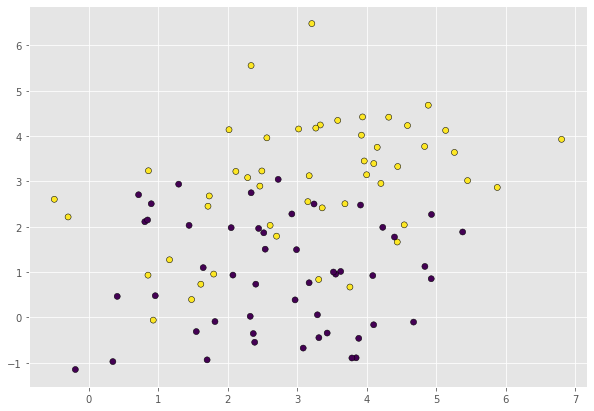

In [ ]:
# Choose a random seed.
seed = 42
# Fix it for numpy and tensorflow calculations.
rng = np.random.RandomState(seed)
tf.random.set_seed(seed)

# Generate classification data as a set of points and their labels.
x, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=seed,
    n_clusters_per_class=1
)

# Add random uniform noise to the data.
x += 4 * rng.uniform(size=x.shape)

print('Inputs (X) shape: {}'.format(x.shape))
print('Lables (y) shape: {}'.format(y.shape))

plt.scatter(x[:,0], x[:,1],c=y,edgecolor='k');

## 3 Create a Logistic Regression Model
Here we will train a [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) classifier. Logistic regression is equivalent to a one-layer neural network with sigmoid activation.

We are using sigmoid activation, so the model prediction will be the prediction probability of class 1.

Basically, logistic regression is equivalent to a one-layer neural network, so let's implement it with TensorFlow.
The output vector `y_predicted` consists of the predicted estimations on whether the points belong to the class with
label '1'.
It is worth mentioning that `tf.keras` provides a mechanism for training, hence it is not needed to create any special
classes to fit the model and make predictions.

The following function creates the Logistic Regression Model using the TensorFlow `Sequential()` method.

In [ ]:
# two-class logistic regression model
def logistic_regression(train_input):
    logistic_regression_model = Sequential()

    # model consists of one layer and sigmoid activation
    logistic_regression_model.add(Dense(1, activation='sigmoid', input_dim=train_input.shape[1]))
    return logistic_regression_model

## 4 Training and Prediction

We need to split our data to train and test sets and feed it to the <a href="https://en.wikipedia.org/wiki/Logistic_regression" target=_blank>Logistic Regression</a> algorithm.

We use `train_test_split` from scikit-learn library to easily divide our data into train and test subsets. We also
should specify loss and optimizer for training. In our case they are Binary Cross Entropy Loss and Stochastic
Gradient Descent correspondingly.

In [ ]:
# prepare train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)

x_train, y_train = tf.convert_to_tensor(x_train, dtype=tf.float32),\
                   tf.convert_to_tensor(y_train, dtype=tf.float32)

x_test, y_test = tf.convert_to_tensor(x_test, dtype=tf.float32),\
                 tf.convert_to_tensor(y_test, dtype=tf.float32)

# define model
log_regression_model = logistic_regression(train_input=x_train)

# define optimizer
optimizer = SGD(lr=0.01)

# set optimizer, loss and metrics for our training
log_regression_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# initialize and start training
log_regression_model.fit(epochs=100, x=x_train, y=y_train, use_multiprocessing=False)

# get predicted labels after training is done
y_predicted = log_regression_model.predict(x_test)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 4ms/step - loss: 0.8687 - accuracy: 0.5200
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8565 - accuracy: 0.5200
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8453 - accuracy: 0.5200
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8341 - accuracy: 0.5200
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8244 - accuracy: 0.5200
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8159 - accuracy: 0.5067
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.8066 - accuracy: 0.5067
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7982 - accuracy: 0.5067
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7860 - accuracy: 0.5067
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7782 - accuracy: 0.5200
Epoch 11/100
3/3 [=======================

## 5 Confusion Matrix
<img src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w3_confusion_matrix.png" width=600>

Using tf.keras.metrics, we can very easily obtain the TruePositive (`TP`), FalsePositive (`FP`), TrueNegative (`TN`), and FalseNegative (`FN`). We just need to initilialize the correct method and call the `update_state()` method.

For example, the following code syntax show how to obtain `TP`:
```
TP = tf.keras.metrics.TruePositives(
        thresholds=thres_prob, name=None, dtype=None
    )
TP.update_state(y_test, y_predicted)
TP.result().numpy()
```

The `TP.result().numpy()` outputs the final `TP` value.

To know the details of `tf.keras.metrics`, you can visit the <a href="https://www.tensorflow.org/api_docs/python/tf/keras/metrics" target=_blank>official docs</a>.

Below, we have implemented two functions:
* `get_tp_fp_tn_fn()`: This function accepts the thres_prob as an argument and return the `TP`, `FP`, `FN`, `TN` values.
* `confusion_matrix()`: This function accepts the `TP`, `FP`, `FN`, `TN` values and returns the confusion metrics.

**`confusion_matrix`:** Returns confusion matrix:
```
[[TP, FP],
 [FN, TN]]
```

In [ ]:
def confusion_matrix(TP, FP, FN, TN):
        """
        get confusion matrix as defined in figure
        """
        cm = np.array([[TP, FP],
                      [FN, TN]])

        num_p = TP + FP
        num_n = TN + FN

        cm_norm = np.array([[TP/num_p, FP/num_p],
                            [FN/num_n, TN/num_n]])
        return cm, cm_norm

def get_tp_fp_tn_fn(thres_prob=0.5):
    TP = tf.keras.metrics.TruePositives(
        thresholds=thres_prob, name=None, dtype=None
    )
    TP.update_state(y_test, y_predicted)
    FP = tf.keras.metrics.FalsePositives(
        thresholds=thres_prob, name=None, dtype=None
    )
    FP.update_state(y_test, y_predicted)
    TN = tf.keras.metrics.TrueNegatives(
        thresholds=thres_prob, name=None, dtype=None
    )
    TN.update_state(y_test, y_predicted)
    FN = tf.keras.metrics.FalseNegatives(
        thresholds=thres_prob, name=None, dtype=None
    )
    FN.update_state(y_test, y_predicted)
    return TP.result().numpy(), FP.result().numpy(), FN.result().numpy(), TN.result().numpy()

Confusion Matrix for threshold probability 0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in float_scalars
  if sys.path[0] == '':


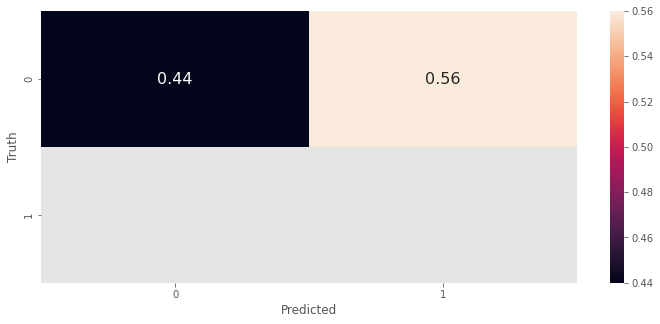

Confusion Matrix for threshold probability 0.6


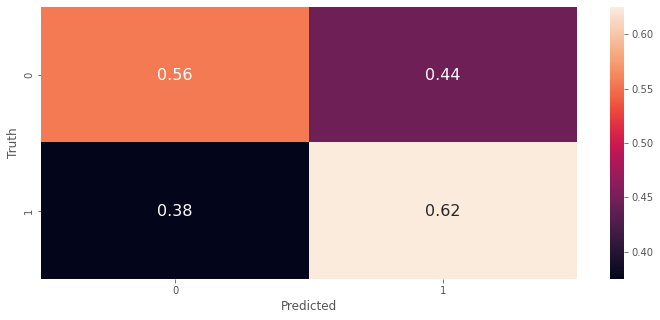

In [ ]:
# threshold probability 0.5
tp, fp, fn, tn = get_tp_fp_tn_fn(0.1)
print('Confusion Matrix for threshold probability 0.5')
cm, cm_norm = confusion_matrix(tp, fp, fn, tn)



plt.figure(figsize=[12, 5])
sn.heatmap(cm_norm, annot=True, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# threshold probability 0.6
tp, fp, fn, tn = get_tp_fp_tn_fn(0.6)
print('Confusion Matrix for threshold probability 0.6')
cm, cm_norm = confusion_matrix(tp, fp, fn, tn)

plt.figure(figsize=[12, 5])
sn.heatmap(cm_norm, annot=True, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


TensorFlow also provides `tf.math.confusion_matrix()` function. We can use this function to directly get the confusion matrix by providing the true labels and predicted labels as arguments. To know more, you may visit the <a href="https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix" target=_blank>official docs</a>.

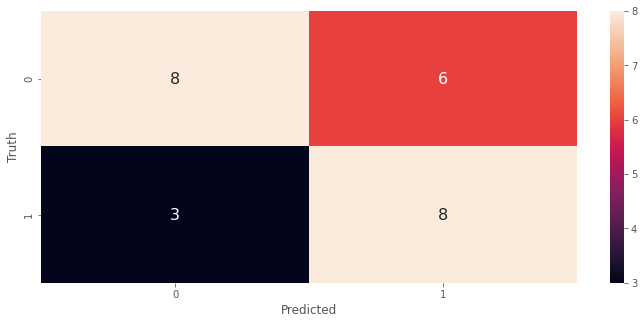

In [ ]:
preds = tf.cast(y_predicted>0.5, dtype=tf.float32)

cm = tf.math.confusion_matrix(y_test, preds)

plt.figure(figsize=[12, 5])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## 6 Accuracy
<img src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w3_accuracy.png" width=600>

$$
accuracy = \frac{TP + TN}{TP + FP + FN + TN}
$$

We can use the <a href="https://www.tensorflow.org/api_docs/python/tf/keras/metrics/binary_accuracy" target=_blank>`binary_accuracy()`</a> function from `tf.keras.metrics` to calculate the accuracy. We just need to provide the `y_test`, `y_predicted`, and the desired `threshold` as arguments.

***Note***: *The true labels and predicted values should have the same dimension. Therefore, in the following code block, we are adding an extra batch dimension to `y_test` using `tf.expand_dims`.*

In [ ]:
preds = tf.cast(y_predicted >= 0.5, dtype=tf.float32)
accuracy = tf.keras.metrics.binary_accuracy(tf.expand_dims(y_test, 1), y_predicted, threshold=0.5)
print(f"Accuracy at threshold 0.5: {tf.reduce_mean(accuracy).numpy()}")

Accuracy at threshold 0.5: 0.6399999856948853


## 7 Precision
<img src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w3_precision.png" width=600>

$$
precision = \frac{TP}{TP + FP}
$$



To calculate the precision value at a certain threshold, we can use `tf.keras.metrics.Precision()`. See the <a href="https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision" target=_blank>docs here</a>.

In [ ]:
threshold = 0.5
precision = tf.keras.metrics.Precision(thresholds=threshold)
precision.update_state(y_test, y_predicted)
print(f"Precision at threhold 0.5: {precision.result().numpy()}")

Precision at threhold 0.5: 0.5714285969734192


## 8 Recall / Sensitivity
<img src='https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w3_recall.png' width=600>

$$
recall = \frac{TP}{TP + FN}
$$

For caluclating recall, we can use the `tf.keras.metrics.Recall()` class. See <a href="https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall" target=_blank>docs here</a>.

In [ ]:
threshold = 0.5
precision = tf.keras.metrics.Recall(thresholds=threshold)
precision.update_state(y_test, y_predicted)
print(f"Recall at threhold 0.5: {precision.result().numpy()}")

Recall at threhold 0.5: 0.7272727489471436


## 9 F1-Score
$$
F_1 score = \frac{2 TP}{2TP + FP + FN}
$$

But TensorFlow does not provide any predifined class or function to calculate the F1-score. Still, we can do that pretty easily. We know that using `tf.keras.metrics` we can calculate the TP, FP, FN, and TN. After that, we can use the above formula to calcuate the F1-score. It is still less work when compared to writing everything from scratch.

In [ ]:
thres_prob = 0.5
predictions = y_predicted > thres_prob
tp, fp, fn, tn = get_tp_fp_tn_fn(thres_prob)
f1_score = (2*tp)/(2*tp + fp + fn)
print(f"F1-Score at threhold 0.5: {f1_score}")

F1-Score at threhold 0.5: 0.64


## 10 ROC Curve

<img src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w3_roc.png" width=700>


\begin{align}
TPR (recall) &= \frac{TP}{TP + FN} \\
FPR &= \frac{FP}{FP + TN} \\
\end{align}

### 10.1 ROC Curve using Confusion Matrix
We can calculate the AUC value using the `tf.keras.metrics.AUC()`. But before that, we generate a list of threshold values. The following code cell generates 1000 threshold values and stores them in `thresholds`.

In [ ]:
thresholds = np.linspace(0.001, 0.999, 1000)
len(thresholds)

1000

Then we can initialize the `tf.keras.metrics.AUC()` class and call the `update_state()` method to get the AUC.

In [ ]:
auc = tf.keras.metrics.AUC(thresholds=thresholds)
auc.update_state(y_test, y_predicted)
print(f"AUC: {auc.result().numpy()}")

AUC: 0.7824674844741821


Now to plot the ROC curve using the `thresholds`.

In [ ]:
tpr_list, fpr_list = [], []
for threshold in thresholds:
    # get TP, FP, FN, and TN to calculate TPR and FPR
    tp, fp, fn, tn = get_tp_fp_tn_fn(threshold)

    # Sensitivity, recall, or true positive rate
    tpr = tp / (tp + fn)
    tpr_list.append(tpr)

    # False positive rate
    fpr = fp / (fp + tn)
    fpr_list.append(fpr)

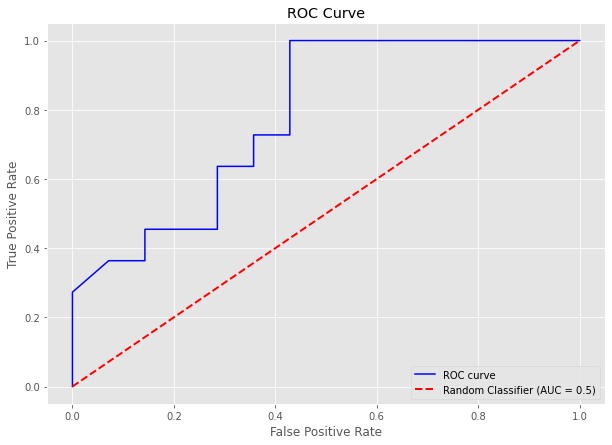

In [ ]:
plt.plot(fpr_list, tpr_list, label='ROC curve', color='b')
plt.plot([0, 1], [0, 1], label='Random Classifier (AUC = 0.5)', linestyle='--', lw=2, color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show(block=block_plot)